<a href="https://colab.research.google.com/github/Hideki-Kagaya/Stable_Diffusion_Simply/blob/main/stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ノートブックを開いた直後とタイムアウトなどでセッション切断後は必ず実行すること

# 必要ライブラリのインストールと読み込み
!pip install diffusers==0.2.4 transformers scipy ftfy

# Stable Diffusionの使用準備
from diffusers import StableDiffusionPipeline

#@title トークンの入力(必須) { display-mode: "both" }
your_token = "" #@param {type:"string"}

# パイプラインの構築
pipe = StableDiffusionPipeline.from_pretrained(
    'CompVis/stable-diffusion-v1-4',
    # VRAMの容量が少なくランタイムエラーとなる場合、下記のコメントアウトを解除して負荷を減らしてみる
    # torch_dtype=torch.float16,
    # revision='fp16',
    use_auth_token=your_token)
pipe.to('cuda')

0it [00:00, ?it/s]

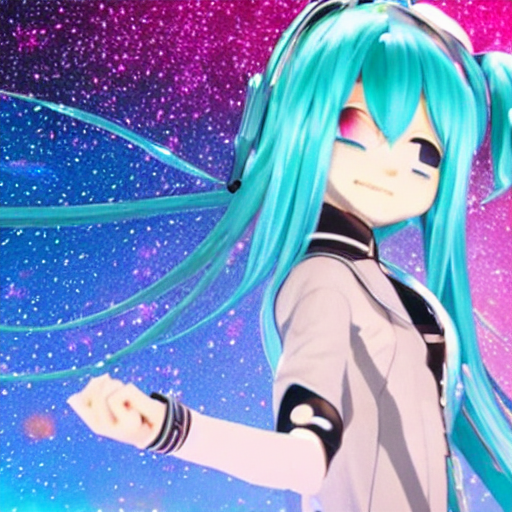

In [2]:
#画像の生成と表示
from torch import autocast
from datetime import datetime
from IPython.display import Image

#@title テキストを入力 { display-mode: "both" }
keyword = "Hatsune Miku is Singing in the Universe" #@param {type:"string"}

# ファイル名を年月日と時刻で設定
filename = datetime.now().strftime('%Y%m%d%H%M') + '.png'

# 入力されたテキストから画像生成
with autocast('cuda'):
    generaled = pipe(keyword)['sample'][0]
    generaled.save(filename)

Image(filename)

# ローカルで実行する場合は、17行目の代わりに下記コードを追加して既存のビューワーで画像を開く
# from PIL import Image
# im = Image.open(filename)
# im.show()

In [3]:
#@title 画像ファイルのダウンロード(Google Chromeのみ)
from google.colab import files

files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>